# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
pd.options.display.max_rows = 999

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [2]:
data=pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


Remove the duplicate index column from the dataset. 

In [3]:
data=data.drop('name',axis=1)
data

,Longitude,Latitude,continent
0,-69.982677,12.520880,North America
1,66.004734,33.835231,Asia
2,17.537368,-12.293361,Africa
3,-63.064989,18.223959,North America
4,20.049834,41.142450,Europe
5,19.953288,60.214887,Europe
6,1.560544,42.542291,Europe
7,54.300167,23.905282,Asia
8,-65.179807,-35.381349,South America
9,44.929933,40.289526,Asia


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data['continent']=data['continent'].map({'North America':1,'Asia':2,'Europe':3,'Africa':4,'Oceania':5,'South America':6,'Seven seas (open ocean)':7,'Antarctica':8})

## Select the features

In [5]:
x=data.iloc[:,2:3]
x

,continent
0,1
1,2
2,4
3,1
4,3
5,3
6,3
7,2
8,6
9,2


## Clustering

Use 4 clusters initially.

In [6]:
kmeans=KMeans(7)
clusters=kmeans.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Clustering results

In [7]:
clusters


array([5, 1, 3, 5, 2, 2, 2, 1, 6, 1, 0, 4, 0, 4, 5, 0, 2, 1, 3, 2, 3, 3,
       1, 2, 1, 5, 5, 2, 5, 2, 5, 5, 6, 6, 5, 1, 1, 3, 3, 2, 6, 1, 3, 3,
       3, 3, 0, 6, 3, 3, 5, 5, 5, 5, 1, 1, 2, 2, 3, 5, 2, 5, 3, 6, 3, 3,
       2, 2, 3, 2, 0, 6, 2, 2, 0, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 5, 5, 5,
       0, 6, 1, 4, 5, 2, 5, 2, 1, 2, 1, 1, 4, 2, 1, 1, 2, 1, 2, 5, 2, 1,
       1, 1, 1, 3, 1, 1, 0, 5, 1, 2, 1, 1, 1, 3, 3, 5, 2, 1, 3, 2, 2, 2,
       1, 5, 3, 2, 2, 3, 4, 5, 0, 2, 3, 2, 1, 2, 1, 0, 3, 3, 5, 4, 3, 1,
       3, 0, 3, 0, 3, 5, 0, 2, 2, 1, 0, 0, 1, 1, 5, 0, 6, 1, 0, 0, 2, 5,
       1, 2, 6, 1, 0, 1, 2, 2, 3, 3, 1, 3, 3, 3, 1, 4, 4, 0, 3, 5, 2, 3,
       3, 5, 2, 3, 6, 2, 2, 2, 3, 5, 4, 1, 5, 3, 3, 1, 1, 1, 1, 0, 5, 3,
       1, 1, 3, 3, 2, 6, 5, 1, 2, 5, 6, 5, 5, 1, 0, 0, 0, 1, 3, 3, 3])

In [8]:
data['clusters']=clusters


## Plot the data

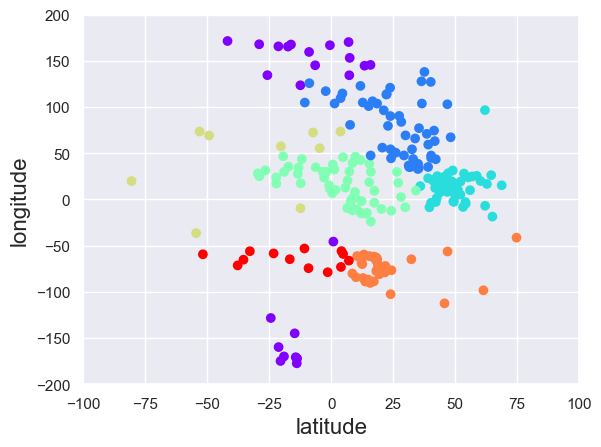

In [9]:
plt.scatter(data['Latitude'],data['Longitude'],c=clusters,cmap='rainbow')
plt.xlabel("latitude",fontsize=16)
plt.xlim([-100,100])
plt.ylim([-200,200])
plt.ylabel("longitude",fontsize=16)
plt.show()

In [10]:
wcss=[]
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.fit(x).inertia_)
    
wcss

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[615.0373443983403,
 190.1387234042553,
 79.83253702818922,
 46.20179820179821,
 24.06993006993007,
 7.454545454545454]

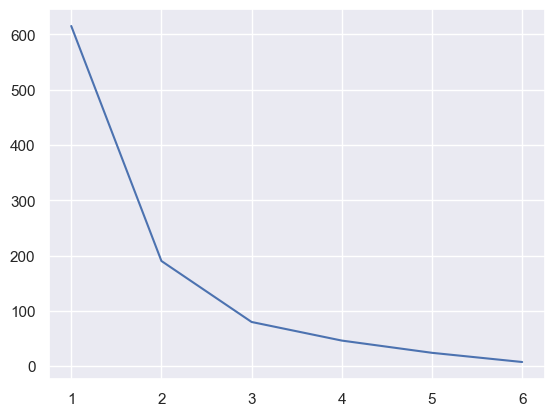

In [12]:
plt.plot(range(1,7),wcss)
plt.show()